# 1.문제정의
- 정시도착(0) : 높게하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.데이터수집

In [2]:
train = pd.read_csv('./train1.csv')
test = pd.read_csv('./test1.csv')
pd.read_csv('./sampleSubmission.csv')

,ID,Reached.on.Time_Y.N
0,7000,NaN
1,7001,NaN
2,7002,NaN
3,7003,NaN
4,7004,NaN
...,...,...
3995,10995,NaN
3996,10996,NaN
3997,10997,NaN
3998,10998,NaN


# 3.데이터전처리
- 결측치를 최빈값으로 채우기

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6999 non-null   int64  
 1   Warehouse_block      6999 non-null   object 
 2   Mode_of_Shipment     6999 non-null   object 
 3   Customer_care_calls  5423 non-null   float64
 4   Customer_rating      6999 non-null   int64  
 5   Cost_of_the_Product  6999 non-null   int64  
 6   Prior_purchases      6049 non-null   float64
 7   Product_importance   6999 non-null   object 
 8   Gender               6999 non-null   object 
 9   Discount_offered     3468 non-null   float64
 10  Weight_in_gms        6999 non-null   object 
 11  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 656.3+ KB


In [4]:
train.describe()
#Customer_care_calls 고객지원전화
#Customer_rating 고객평가
#Cost_of_the_Product 제품비용
#Prior_purchases 이전구매
#Discount_offered 할인 제공
#Reached.on.Time_Y.N 시간안에 도착

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
count,6999.000000,5423.000000,6999.000000,6999.000000,6049.000000,3468.000000,6999.000000
mean,3500.000000,4.054582,3.023718,214.249178,3.576294,13.269031,0.594656
std,2020.581599,1.131019,2.149861,208.294273,1.530933,16.070188,0.490993
min,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,0.000000
25%,1750.500000,3.000000,2.000000,169.000000,3.000000,4.000000,0.000000
50%,3500.000000,4.000000,3.000000,214.000000,3.000000,7.000000,1.000000
75%,5249.500000,5.000000,4.000000,251.000000,4.000000,10.000000,1.000000
max,6999.000000,7.000000,99.000000,9999.000000,10.000000,65.000000,1.000000


In [5]:
train['Customer_care_calls'].value_counts()

4.0    1756
3.0    1620
5.0    1147
6.0     496
2.0     287
7.0     117
Name: Customer_care_calls, dtype: int64

In [6]:
train['Customer_care_calls'] = train['Customer_care_calls'].fillna('4.0')
train['Customer_care_calls'].value_counts()

4.0    1756
3.0    1620
4.0    1576
5.0    1147
6.0     496
2.0     287
7.0     117
Name: Customer_care_calls, dtype: int64

In [7]:
train['Prior_purchases'].value_counts()

3.0     2176
2.0     1423
4.0     1162
5.0      735
6.0      310
10.0     101
8.0       72
7.0       70
Name: Prior_purchases, dtype: int64

In [8]:
train['Prior_purchases'] = train['Prior_purchases'].fillna('3.0')
train['Prior_purchases'].value_counts()

3.0     2176
2.0     1423
4.0     1162
3.0      950
5.0      735
6.0      310
10.0     101
8.0       72
7.0       70
Name: Prior_purchases, dtype: int64

In [9]:
train['Discount_offered'].value_counts()

9.0     287
10.0    278
2.0     278
3.0     277
1.0     272
       ... 
50.0     10
18.0     10
42.0      9
26.0      8
43.0      7
Name: Discount_offered, Length: 65, dtype: int64

In [10]:
train['Discount_offered'] = train['Discount_offered'].fillna('9.0')
train['Discount_offered'].value_counts()

9.0     3531
9.0      287
10.0     278
2.0      278
3.0      277
        ... 
18.0      10
50.0      10
42.0       9
26.0       8
43.0       7
Name: Discount_offered, Length: 66, dtype: int64

In [11]:
train['Reached.on.Time_Y.N'].unique()

array([1, 0], dtype=int64)

In [12]:
train['Customer_care_calls'].unique()

array([2.0, 5.0, 3.0, '4.0', 4.0, 6.0, 7.0], dtype=object)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   6999 non-null   int64 
 1   Warehouse_block      6999 non-null   object
 2   Mode_of_Shipment     6999 non-null   object
 3   Customer_care_calls  6999 non-null   object
 4   Customer_rating      6999 non-null   int64 
 5   Cost_of_the_Product  6999 non-null   int64 
 6   Prior_purchases      6999 non-null   object
 7   Product_importance   6999 non-null   object
 8   Gender               6999 non-null   object
 9   Discount_offered     6999 non-null   object
 10  Weight_in_gms        6999 non-null   object
 11  Reached.on.Time_Y.N  6999 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 656.3+ KB


In [14]:
train.corr()

,ID,Customer_rating,Cost_of_the_Product,Reached.on.Time_Y.N
ID,1.000000,0.007690,0.009738,-0.014909
Customer_rating,0.007690,1.000000,-0.001961,0.011275
Cost_of_the_Product,0.009738,-0.001961,1.000000,-0.012811
Reached.on.Time_Y.N,-0.014909,0.011275,-0.012811,1.000000


<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='count'>

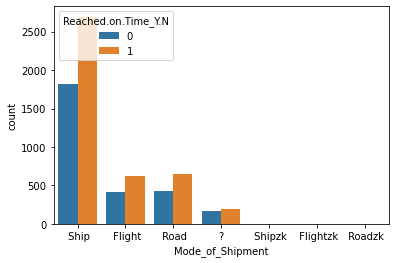

In [15]:
sns.countplot(data = train, # 사용할 데이터
              x = 'Mode_of_Shipment', # X축으로 사용할 컬럼
              hue = 'Reached.on.Time_Y.N')  # count에 대한 기준컬럼

<AxesSubplot:xlabel='Customer_rating', ylabel='count'>

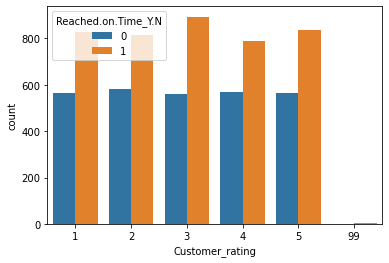

In [16]:
sns.countplot(data = train, # 사용할 데이터
              x = 'Customer_rating', # X축  회사는 모든 고객으로부터 평가했습니다. 1은 최저 (최악), 5는 최고 (최고)입니다
              hue = 'Reached.on.Time_Y.N')  # count에 대한 기준컬럼

<AxesSubplot:xlabel='Customer_care_calls', ylabel='count'>

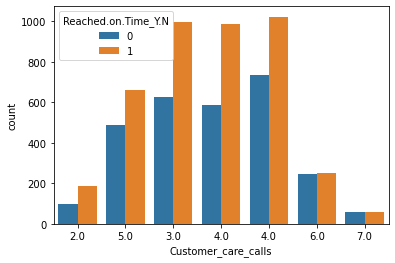

In [17]:
sns.countplot(data = train, # 사용할 데이터
              x = 'Customer_care_calls', # X축  배송 조회를위한 문의 전화 수입니다.
              hue = 'Reached.on.Time_Y.N')  # count에 대한 기준컬럼

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='count'>

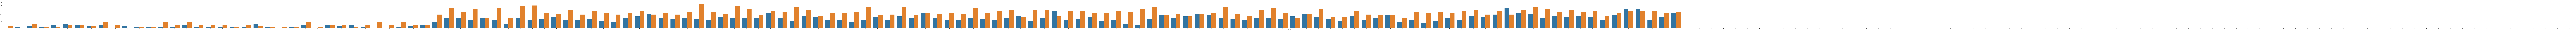

In [18]:
plt.figure(figsize=(900,10))
sns.countplot(data = train, # 사용할 데이터
              x = 'Cost_of_the_Product', # X축  제품 비용 (미국 달러).
              hue = 'Reached.on.Time_Y.N')  # count에 대한 기준컬럼

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='count'>

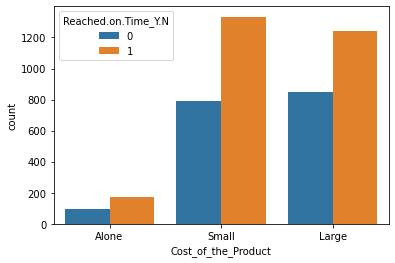

In [19]:
bins = [96,132,185,236]# 범주범위지 정
labels = ['Alone','Small','Large']
train['Cost_of_the_Product']=pd.cut(train['Cost_of_the_Product'],bins=bins, labels=labels)
test['Cost_of_the_Product']=pd.cut(test['Cost_of_the_Product'],bins=bins, labels=labels)

sns.countplot(data = train, 
              x = 'Cost_of_the_Product', 
              hue = 'Reached.on.Time_Y.N') 

<AxesSubplot:xlabel='Prior_purchases', ylabel='count'>

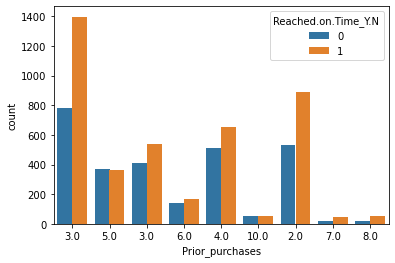

In [20]:
sns.countplot(data = train, # 사용할 데이터
              x = 'Prior_purchases', # X축  이전 구매 횟수
              hue = 'Reached.on.Time_Y.N')  # count에 대한 기준컬럼 

<AxesSubplot:xlabel='Product_importance', ylabel='count'>

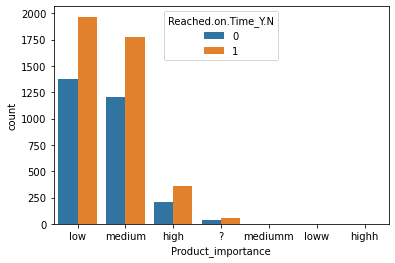

In [21]:
sns.countplot(data = train, # 사용할 데이터
              x = 'Product_importance', # X축  회사는 낮음, 중간, 높음과 같은 다양한 매개 변수로 제품을 분류했습니다.
              hue = 'Reached.on.Time_Y.N')  # count에 대한 기준컬럼

<AxesSubplot:xlabel='Gender', ylabel='count'>

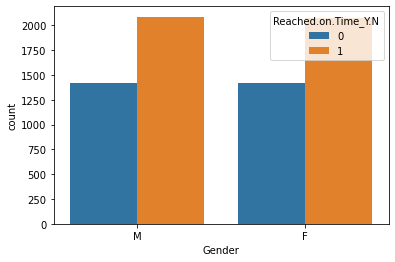

In [22]:
sns.countplot(data = train, # 사용할 데이터
              x = 'Gender', # X축으로 사용할 컬럼
              hue = 'Reached.on.Time_Y.N')  # count에 대한 기준컬럼

<AxesSubplot:xlabel='Weight_in_gms', ylabel='count'>

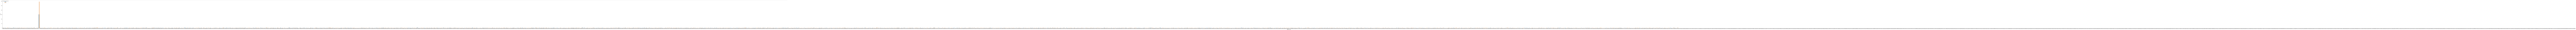

In [23]:
plt.figure(figsize=(900,10))
sns.countplot(data = train, # 사용할 데이터
              x = 'Weight_in_gms', # X축으로 사용할 컬럼
              hue = 'Reached.on.Time_Y.N')  # count에 대한 기준컬럼

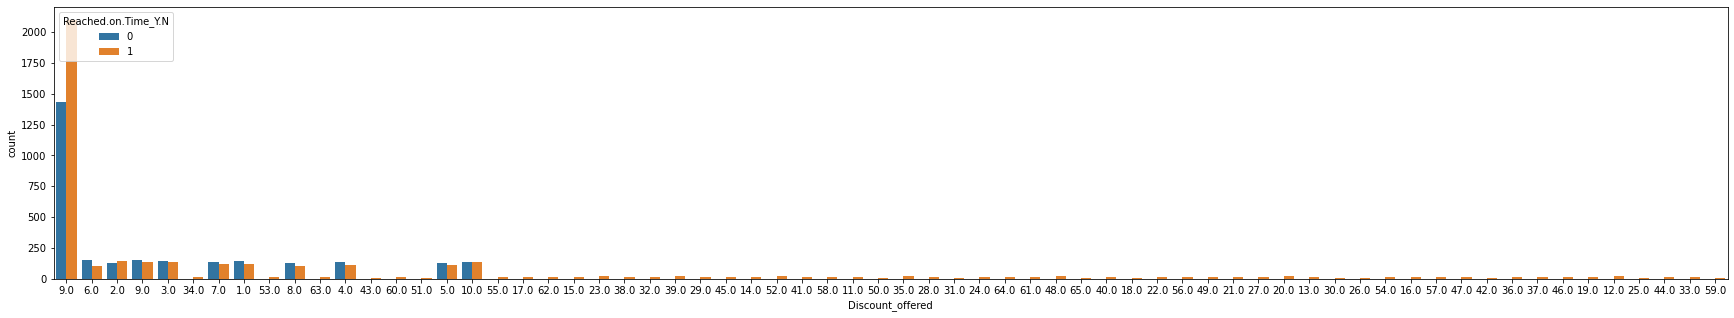

In [24]:
plt.figure(figsize=(30,5))
d = sns.countplot(data = train, # 사용할 데이터
              x = 'Discount_offered', # X축 특정 제품에 대해 제공되는 할인입니다.
              hue = 'Reached.on.Time_Y.N')  # count에 대한 기준컬럼

<AxesSubplot:xlabel='Prior_purchases', ylabel='count'>

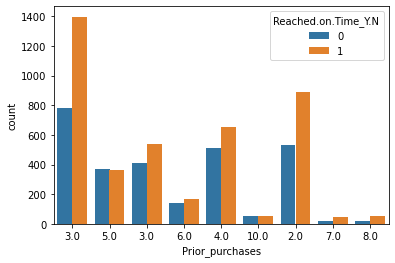

In [25]:
sns.countplot(data = train, # 사용할 데이터
              x = 'Prior_purchases', # X축  이전 구매 : 이전 구매 횟수
              hue = 'Reached.on.Time_Y.N')  # count에 대한 기준컬럼

In [26]:
train.columns

Index(['ID', 'Warehouse_block ', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [27]:
test.columns

Index(['ID', 'Warehouse_block ', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')